# Primer Avance PIA

*Equipo: 9*

*Grupo 002: Clase Del Miercoles*

*Marco Antonio Oviedo Acevedo    1851698*

*Nayelli Alondra Gaona Allende   1860995*

*Eliud Moreno Narvaez            1863955*

*Luis Adrian Navarro Garcia    1866581*

	

## 1) Titulo de la base de datos

***a)
Nombre con el que se encuentra en la pagina encontrada.***

*Credit Card Fraud Detection*

***b)
Url de la pagina.***

https://www.kaggle.com/mlg-ulb/creditcardfraud

## 2) Introducción General

***a)
Realizar una descripcion sobre el tema en donde se desarrolla su base de datos.***

En resumidas cuentas, un fraude con tarjeta de crédito es un hecho mediante el cual unos delincuentes realizan operaciones como consumos en establecimientos físicos o virtuales, adelantos de efectivo, entre otras, para lo cual se aprovechan de la línea de crédito de los consumidores afectados.
Un fraude con tarjeta de crédito puede ocurrir mediante el hurto o el robo de la tarjeta física y el PIN o clave secreta, o del único conocimiento de los datos confidenciales de esta, es decir su numeración completa, la fecha de vencimiento y el código CVV. En dicha medida, estos delincuentes pueden aprovechar y acumular diversos cargos con cargo a la línea
de la tarjeta de crédito.

La predicción del fraude, y es que el comportamiento malicioso o fraude sigue patrones específicos y, por lo tanto, se puede predecir con base en ellos.
A través del aprendizaje supervisado, se puede clasificar como fraudulenta o legítima a través de datos con una etiqueta clara sobre una pregunta base. Si la empresa financiera tiene acceso a todas las transacciones que se realizan con sus tarjetas, puede crear grandes conjuntos de datos y marcar los fraudes como tal. Así el machine learning, cuando vea algo similar lo detectará como fraude

## 3) Descripción de los datos

***a)
Que tipo de datos son.***

Es un DataSet en csv que contiene transacciones 284.807 transacciones y solo contiene variables numericas

***b)
Descripcion de las columnas.***

El conjunto de datos contiene transacciones realizadas con tarjetas de crédito en septiembre de 2013 por titulares de tarjetas europeos.
Este conjunto de datos presenta transacciones que ocurrieron en dos días, donde tenemos 492 fraudes de 284.807 transacciones. El conjunto de datos está muy desequilibrado, la clase positiva (fraudes) representa el 0,172% de todas las transacciones.

Contiene solo variables de entrada numéricas que son el resultado de una transformación PCA. Desafortunadamente, debido a problemas de confidencialidad, no podemos proporcionar las características originales y más información de fondo sobre los datos. Las características V1, V2,… V28 son los componentes principales obtenidos con PCA, las únicas características que no se han transformado con PCA son 'Tiempo' y 'Cantidad'. La característica 'Tiempo' contiene los segundos transcurridos entre cada transacción y la primera transacción en el conjunto de datos. La función 'Importe' es el Importe de la transacción; esta función se puede utilizar para el aprendizaje dependiente de los costes por ejemplo. La característica 'Clase' es la variable de respuesta y toma el valor 1 en caso de fraude y 0 en caso contrario.

## 4) Justificacion del uso de datos

La base de datos viene ordenada de una manera practica y muy útil, lo que nos permitira realizar analisis con mayor facilidad y si se llega a requerrir el uso de modelos matematicos sera de una manera muy directa puesto que no contiene variables categoricas. Por otra parte la caracteristica que contendra la variable respuesta ya esta transformada en 1 en caso de fraude y 0 en caso contrario haciendonos ahorrar tiempo y esfuezo en el codigo 

## 5) Objetivo Final.

***Objetivo Principal.***

Poder analizar el comportamiento de los fraudes de nuestro DataSet

***Objetivos Secundarios.***

*    Poder determinar con mayor exactitud las transacciones fraudulentas
*    Poder detectar los falsos positivos puesto que esto puede ocasionar una perdida de tiempo

## 6) Mencionar Las Preguntas De Interes.

*    ¿Existe algun patron a simple vista que nos ayuda a determinar las transacciones fraudulentas?
*    ¿Las transacciones fraudulentas tienen alguna correlación con alguna de nuestras variables?

## 7) Parte de programación.

***Importar librerias y bases de datos.***

In [23]:
#import "Libreria" as "Abreviacion"
import pandas as pd #pd es la abreviacion que usaremos para pandas
import os
import numpy as np
import matplotlib.pyplot as plt 

In [8]:
mainpath = "/Python-ML/datasets/"
filename = "/creditcard.csv"
fullpath = os.path.join(mainpath, filename)

In [11]:
data = pd.read_csv("DataSets/creditcard.csv") 
# Agregamos .. para subir un nivel 

***Visualizacion de datos.***

In [12]:
data.head() #esta funcion nos enseña una visualizacion de las primeras filas de nuestra data
# El rize csv tiene 31 columnas

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


***Descripción basica de columnas***

In [14]:
data.columns.values #Esta funcion nos mostrara los titulos de nuestras columnas

array(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
       'V28', 'Amount', 'Class'], dtype=object)

In [15]:
data.tail(8) #observamos las ultimas 8 filas

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284799,172783.0,-1.775135,-0.004235,1.189786,0.331096,1.196063,5.519980,-1.518185,2.080825,1.159498,...,0.103302,0.654850,-0.348929,0.745323,0.704545,-0.127579,0.454379,0.130308,79.99,0
284800,172784.0,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,...,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68,0
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [16]:
data.shape # (numero de filas,numero de columnas)

(284807, 31)

In [17]:
data.describe() #resumen de los estadísticos básicos de las variables numéricas.

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [18]:
data.dtypes #mostraremos en pantalla el tipo de datos de mis variables

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [19]:
#veamos si tenemos algun dato null en nuestra variable que más utilizaremos
pd.isnull(data["Class"]).values.ravel().sum()

0

In [20]:
#veamos si tenemos algun dato null en nuestro dataset
pd.isnull(data).values.ravel().sum()

0

In [21]:
#Aunque no se haya encontrado aplicaremos la funcion para remover todos los nulls
data.dropna(axis=0, how="all")

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


Como no tenemos variables categoricas no aplicaremos ningun analisis de variables Dummy

***Pre visualización de graficas***

In [25]:
%matplotlib inline

<AxesSubplot:xlabel='Time', ylabel='Amount'>

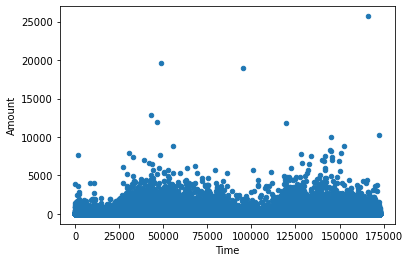

In [26]:
data.plot(kind="scatter", x="Time", y="Amount") #realizamos un grafico de dispersion para las variables tiempo 

Text(0.5, 1.0, 'Histograma del importe de transacciones')

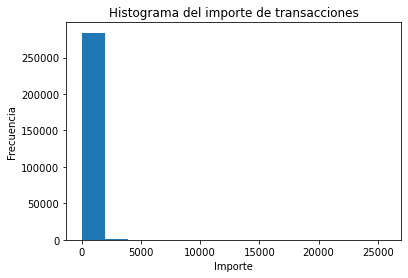

In [46]:
k = int(np.ceil(1+np.log2(3333)))
plt.hist(data["Importe"],  bins = k)
plt.xlabel("Importe")
plt.ylabel("Frecuencia")
plt.title("Histograma del importe de transacciones") #Histograma de los importe de las transacciones

Text(0.5, 1.0, 'Boxplot de los importes de dinero')

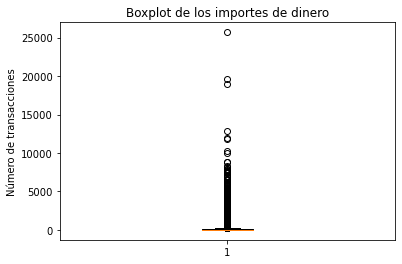

In [29]:
plt.boxplot(data["Amount"])
plt.ylabel("Número de transacciones")
plt.title("Boxplot de los importes de dinero") #BoxPlot de importe de cada transaccion

In [34]:
data["Amount"].describe() #mostramos un analisis con los cuartiles de nuestro boxplot de importe

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

***Cambiar nombre de variables***

In [36]:
data.columns = ['Tiempo','V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
       'V28', 'Importe', 'Clase'] #Cambiamos los nombres de las variables que estan en ingles

In [37]:
data.columns #Esto nos ayudara en analisis posteriores

Index(['Tiempo', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Importe',
       'Clase'],
      dtype='object')